Write a function that takes a Spectrum as a parameter and modifies it by diving each element of hs by the corresponding frequency from fs.
Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0

Test your function using a square, triangle or sawtooth wave:
    
    1. Compute the Spectrum and plot it. 
    2. Modify the Spectrum using your function and plot it again.
    3. Use Spectrum.make_wave() to make a Wave from the modified Spectrum, and listen to it. What effect does this operation have on the signal?

In [1]:
#Exercise

import os, sys

sys.path.insert(1, "D:\\ThinkDSP\\code\\")

from thinkdsp import SquareSignal, TriangleSignal, SawtoothSignal, Spectrum, decorate, SinSignal
from IPython.display import Audio
from ipywidgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
def exercise25(spectrum: Spectrum):
    
    #Plot color as red
    #spectrum.plot(color='#FF0000')
    #decorate(xlabel='Frequency (Hz)')
    
#    if(spectrum.hs[0] != 0):
#        print("Adjusting the value of spectrum.hs[0] to 0 to avoid a division by 0 error")
#        print("hs[0] was ", spectrum.hs[0])
#        spectrum.hs[0] = 0
    
    tempspectrum = copy.deepcopy(spectrum)
    
    #Set variable names
    hs = tempspectrum.hs
    fs = tempspectrum.fs
    
    #for x in range(spectrum.hs.size):
    #    spectrum.hs[x] /= spectrum.fs[x]
    
    #Divide the values
    hs[1:] /= fs[1:]
    hs[0] = 0
    #print(hs)
    #Replot with color as blue
    #spectrum.plot(color='#0000FF')
    #decorate(xlabel='Frequency (Hz)')
    
    return tempspectrum

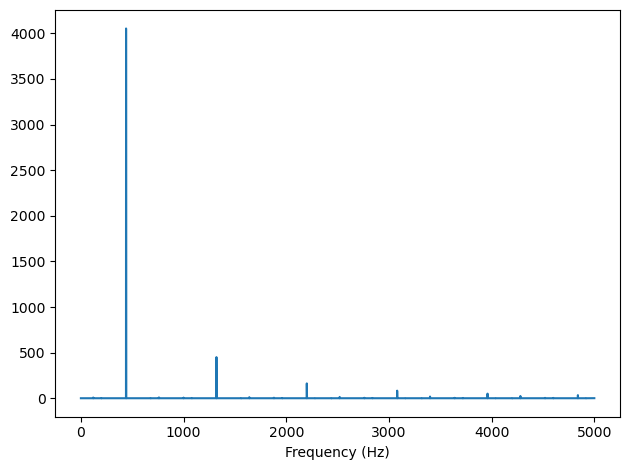

In [10]:
signal = TriangleSignal(freq=440)
#signal = SquareSignal(freq=440)
#signal = SawtoothSignal(freq=440)

wave = signal.make_wave(duration=1, framerate=10000)
#wave = signal.make_wave(duration=1)

testspectrum = wave.make_spectrum()

#print("HS = ", testspectrum.hs)
#print("HS = ", testspectrum.hs.size)
#print("FS = ", testspectrum.fs)
#print("FS = ", testspectrum.fs.size)


#print("HS[0] = ", testspectrum.hs[0])
#print("FS[0] = ", testspectrum.fs[0])

testspectrum.plot()
decorate(xlabel='Frequency (Hz)')

#print(wave.ys)
#print(wave.ts)

#wave.plot()
#decorate(xlabel='Time (s)')


In [11]:
testspectrum2 = exercise25(testspectrum)
testspectrum2.scale(440)

Dividing the spectrum.hs array (amplitude and phase component) by each corresponding spectrum.fs (frequency component) results in a similar plot. However, the first couple of co

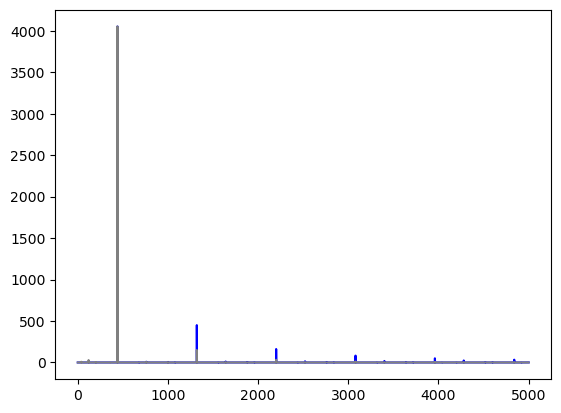

In [12]:

testspectrum.plot(color="blue")
testspectrum2.plot(color="gray")

In [13]:
testspectrum.make_wave().make_audio()

In [14]:
testspectrum2.make_wave().make_audio()

This is acts like a crude filter to move it closer to a sin wave.  

All the modified spectrum plots have significantly smaller magnitudes and a large peak (declining quickly) starting at frequency = 1. The largest peak is no longer at the fundamental frequency, but at 1. There are still peaks at the fundamental and harmonic frequencies, but they're a lot smaller in comparison to the new false peak at 1.  


Triangle wave. Slightly more humming/intereference, but very negligible. No real observable difference in sound between the modified triangle wave. At a frequency of 1100 Hz and a framerate of 10000, there is a false peak close to 0 on the spectrum plot, but the fundamental frequency peak is still the highest. The other peak at 3300 Hz has been significantly blunted. This must be why there is a minimally observed change in the audio. At a framerate of 11025, there is no false peak.

Square wave. Lower/deeper trill, more noise/interference with a square wave. At a frequency of 1100 Hz and a framerate of 10000, there is a false peak larger than the fundamental frequency. At framerate of 11025, the false peak isn't larger than the fundamental frequency, but is the second largest peak.

Sawtooth wave. The modified spectrum sounds like it is muffled for sawtooth wave. At a frequency of 1100 Hz and a framerate of 10000, there is a false peak larger than the fundamental frequency, and a second false peak that makes the 3rd highest peak. At a framerate of 11025, the false peak is significantly larger than the fundamental frequency peak.  

In [8]:
SinSignal(freq=440).make_wave().make_audio()

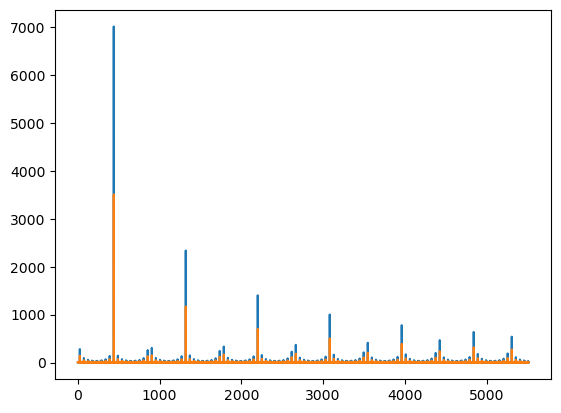

In [9]:
test = SquareSignal(freq=440).make_wave(duration=1).make_spectrum()
test.plot()

test.low_pass(cutoff=0, factor=0.5)
test.plot()